In [1]:
import requests
from bs4 import BeautifulSoup


all_episodes = str(' ')
for i in range(0,92):
  if i < 9:
    season_episode = 's01e0' + str(i+1)
  elif i < 13:
    season_episode = 's01e' + str(i+1)
  elif i < 22:
    season_episode = 's02e0' + str(i-12)
  elif i < 26:
    season_episode = 's02e' + str(i-12)
  elif i < 35:
    season_episode = 's03e0' + str(i-25)
  elif i < 39:
    season_episode = 's03e' + str(i-25)
  elif i < 48:
    season_episode = 's04e0' + str(i-38)
  elif i < 52:
    season_episode = 's04e' + str(i-38)
  elif i < 61:
    season_episode = 's05e0' + str(i-51)
  elif i < 65:
    season_episode = 's05e' + str(i-51)
  elif i < 74:
    season_episode = 's06e0' + str(i-64)
  elif i < 78:
    season_episode = 's06e' + str(i-64)
  elif i < 87:
    season_episode = 's07e0' + str(i-77)
  else:
    season_episode = 's07e' + str(i-77)
  print(season_episode)
  r = requests.get('https://www.springfieldspringfield.co.uk/view_episode_scripts.php?tv-show=mad-men&episode=' + season_episode)
  bs = BeautifulSoup(r.text).find_all(class_='scrolling-script-container')
  for i in bs:
    texto = i
  bs = texto.get_text(strip=True)
  all_episodes = all_episodes + bs + str(' ')


s01e01


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


s01e02
s01e03
s01e04
s01e05
s01e06
s01e07
s01e08
s01e09
s01e10
s01e11
s01e12
s01e13
s02e01
s02e02
s02e03
s02e04
s02e05
s02e06
s02e07
s02e08
s02e09
s02e10
s02e11
s02e12
s02e13
s03e01
s03e02
s03e03
s03e04
s03e05
s03e06
s03e07
s03e08
s03e09
s03e10
s03e11
s03e12
s03e13
s04e01
s04e02
s04e03
s04e04
s04e05
s04e06
s04e07
s04e08
s04e09
s04e10
s04e11
s04e12
s04e13
s05e01
s05e02
s05e03
s05e04
s05e05
s05e06
s05e07
s05e08
s05e09
s05e10
s05e11
s05e12
s05e13
s06e01
s06e02
s06e03
s06e04
s06e05
s06e06
s06e07
s06e08
s06e09
s06e10
s06e11
s06e12
s06e13
s07e01
s07e02
s07e03
s07e04
s07e05
s07e06
s07e07
s07e08
s07e09
s07e10
s07e11
s07e12
s07e13
s07e14


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline


In [4]:
stop_words = set(stopwords.words('english'))
swl = list(stop_words)
for i in range(0,len(swl)):
  swl.append(swl[i].upper())

punct = []
for i in range(0,len(string.punctuation)):
  punct.append(string.punctuation[i])

palavrascomuns = []

word_tokens = nltk.word_tokenize(all_episodes)
for i in range(0,len(word_tokens)):
  word_tokens[i].replace('.', '. ')

for w in word_tokens:
  if (w not in swl) & (w not in punct):
    palavrascomuns.append(w)

a_remover = ["n't",'ll',"re","'re","'ve","ve","na","ta","'s","'m","'ll"]
for i in range(0,len(palavrascomuns)):
  if i >= len(palavrascomuns):
    break
  elif palavrascomuns[i] in a_remover:
    palavrascomuns.remove(palavrascomuns[i])
  elif (palavrascomuns[i] == 'ca') or (palavrascomuns[i] == "ca n't"):
    palavrascomuns[i] = "can't"
  elif (palavrascomuns[i] == 'wo') or (palavrascomuns[i] == "wo n't"):
    palavrascomuns[i] = "won't"
  elif palavrascomuns[i] == "should n't":
    palavrascomuns[i] = "shouldn't"
  elif palavrascomuns[i] == "n't worry":
    palavrascomuns[i] = "worry"
  elif palavrascomuns[i] == "gon":
    palavrascomuns[i] = 'gonna'
  else:
    pass


In [5]:
for i in range(0,len(palavrascomuns)):
  if i >= len(palavrascomuns):
    break
  elif "." in palavrascomuns[i]:
    lista = palavrascomuns[i].split(".")
    for j in range(0,len(lista)):
      palavrascomuns.append(lista[j])
    palavrascomuns.remove(palavrascomuns[i])
  else:
    pass

for i in range(0,len(palavrascomuns)):
  if i >= len(palavrascomuns):
    break
  elif (palavrascomuns[i] in swl) or (palavrascomuns[i] in punct):
    palavrascomuns.remove(palavrascomuns[i])
  else:
    pass
    
fdist1 = nltk.FreqDist(palavrascomuns)
d1 = dict(fdist1)
fd1 = pd.DataFrame.from_dict(d1,orient='index')

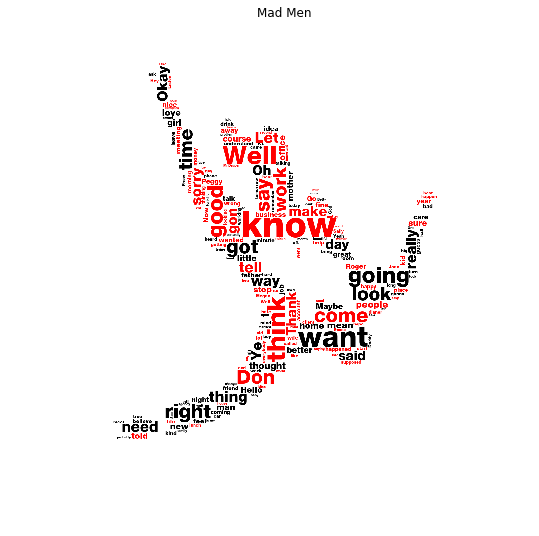

In [6]:
from PIL import Image
from io import BytesIO
import re
import os

r2 = requests.get('http://4.bp.blogspot.com/-OwJH0RhVFq8/VYHhBKQw78I/AAAAAAAAF54/act8tBngo54/s1600/Mad-Men-Don-Draper.jpg')
img = Image.open(BytesIO(r2.content))
mask1 = np.array(img)
blackred = ['black','red']
cmap = LinearSegmentedColormap.from_list('Black Red', blackred , N=2, gamma=1.0)
hnh = 'https://github.com/Goldcap/Constellation/raw/master/trunk/public/flash/walterpollard/Constellation_Camera/graphics/fonts/HelveticaNeue-Heavy.otf'
hnh_file = 'HelveticaNeue-Heavy.otf'
r3 = requests.get(hnh)
open('helvetica_neue_heavy.otf','wb').write(r3.content)

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

lista1 = []
for w in palavrascomuns:
  if (w not in swl) & (w not in punct) & (w not in ENGLISH_STOP_WORDS) & (type(w) == str):
    lista1.append(w)

plt.figure(figsize=(12.0,9.0))
wc1 = WordCloud(background_color="white",width = 1000, height = 500,colormap=cmap,mask=mask1,font_path='helvetica_neue_heavy.otf').generate(" ".join(lista1))
plt.imshow(wc1)
plt.axis('off')
plt.title('Mad Men')
plt.show()